In [1]:
#This code computes medians of errors and uses bootstrapping to calculate errors of medians

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.gridspec as gridspec
import ast
import sys
sys.path.append('../machine-scientist/')
sys.path.append('../machine-scientist/Prior/')
from mcmc import *
from parallel import *
from fit_prior import read_prior_par
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy.stats import bootstrap

In [3]:
errors_approximation=pd.read_csv('../../data/'+ 'all_errors_nguyen1x' + '.csv',index_col=0)
display(errors_approximation)

columns=["sigma", "function","rmse_nn_train", "rmse_nn_test", "rmse_mdl_train", "rmse_mdl_test","r"]
errors_approximation=errors_approximation[columns]
display(errors_approximation)

errors_f1=errors_approximation[errors_approximation['function']==1]
errors_02=errors_f1[errors_f1['sigma']==0.02]
display(errors_02)

,sigma,function,mae_nn_train,mae_nn_test,mae_mdl_train,mae_mdl_test,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,n,r
0,0.00,1,0.041645,1.938429,1.355397e-16,7.190016e-16,0.096256,2.273878,2.103031e-16,1.130134e-15,1,0
1,0.00,1,0.049886,2.105638,1.405889e-16,6.344132e-16,0.116285,2.438433,2.134518e-16,1.016382e-15,1,1
2,0.00,1,0.051987,2.129139,1.231654e-16,9.093255e-16,0.121103,2.458621,2.059831e-16,1.128055e-15,1,2
3,0.02,1,0.038515,1.926238,3.238400e-03,2.129294e-01,0.091641,2.270680,6.415863e-03,2.715548e-01,1,0
4,0.02,1,0.058483,2.192715,1.749198e-03,1.656911e-02,0.133382,2.522208,2.392921e-03,1.797497e-02,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.18,10,0.024106,0.078632,3.500288e-02,4.373102e-02,0.032599,0.087837,4.195916e-02,5.652054e-02,10,1
161,0.18,10,0.020973,0.101032,3.348199e-02,4.278379e-02,0.028642,0.110934,3.753406e-02,5.535585e-02,10,2
162,0.20,10,0.059975,0.254647,3.728207e-02,1.149081e-01,0.071429,0.277439,4.690686e-02,1.310190e-01,10,0
163,0.20,10,0.028298,0.034410,8.814254e-02,6.073678e-02,0.034189,0.042639,1.036397e-01,6.699369e-02,10,1


,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,r
0,0.00,1,0.096256,2.273878,2.103031e-16,1.130134e-15,0
1,0.00,1,0.116285,2.438433,2.134518e-16,1.016382e-15,1
2,0.00,1,0.121103,2.458621,2.059831e-16,1.128055e-15,2
3,0.02,1,0.091641,2.270680,6.415863e-03,2.715548e-01,0
4,0.02,1,0.133382,2.522208,2.392921e-03,1.797497e-02,1
...,...,...,...,...,...,...,...
160,0.18,10,0.032599,0.087837,4.195916e-02,5.652054e-02,1
161,0.18,10,0.028642,0.110934,3.753406e-02,5.535585e-02,2
162,0.20,10,0.071429,0.277439,4.690686e-02,1.310190e-01,0
163,0.20,10,0.034189,0.042639,1.036397e-01,6.699369e-02,1


,sigma,function,rmse_nn_train,rmse_nn_test,rmse_mdl_train,rmse_mdl_test,r
3,0.02,1,0.091641,2.270680,0.006416,0.271555,0
4,0.02,1,0.133382,2.522208,0.002393,0.017975,1
5,0.02,1,0.097643,2.310963,0.001821,0.004658,2


In [21]:
#Melt dataframes and divide train and test
errors_train=errors_approximation[["sigma", "function","rmse_nn_train", "rmse_mdl_train","r"]]
errors_train=pd.melt(errors_train,id_vars=["sigma","function","r"], var_name="error_train",value_name= "value_train")

errors_test=errors_approximation[["sigma", "function","rmse_nn_test", "rmse_mdl_test","r"]]
errors_test=pd.melt(errors_test,id_vars=["sigma","function", "r"], var_name="error_test", value_name= "value_test")

#display(errors_train)
#display(errors_test)

errors_train_f1=errors_train[errors_train['function']==1]
errors_train_02=errors_train_f1[errors_train_f1['sigma']==0.02]
display(errors_train_02)

errors_test_f1=errors_test[errors_test['function']==1]
errors_test_02=errors_test_f1[errors_test_f1['sigma']==0.02]
display(errors_test_02)

,sigma,function,r,error_train,value_train
3,0.02,1,0,rmse_nn_train,0.091641
4,0.02,1,1,rmse_nn_train,0.133382
5,0.02,1,2,rmse_nn_train,0.097643
168,0.02,1,0,rmse_mdl_train,0.006416
169,0.02,1,1,rmse_mdl_train,0.002393
170,0.02,1,2,rmse_mdl_train,0.001821


,sigma,function,r,error_test,value_test
3,0.02,1,0,rmse_nn_test,2.270680
4,0.02,1,1,rmse_nn_test,2.522208
5,0.02,1,2,rmse_nn_test,2.310963
168,0.02,1,0,rmse_mdl_test,0.271555
169,0.02,1,1,rmse_mdl_test,0.017975
170,0.02,1,2,rmse_mdl_test,0.004658


In [64]:
func_number=1

errors_train_plot=errors_train[errors_train['function']==func_number]
errors_test_plot=errors_test[errors_test['function']==func_number]

titles={1: r'$y_1=3.39 x^3 + 2.12 x^2 +1.78x$',
        5: r'$y_5=\sin(x^2) \cos(x)$', 
        7: r'$y_7=\log(x+1.4) + \log(x^2 + 1.3)$',
        8: r'$y_8=\sqrt{1.23x}$',
        10:r'$y_{10}=\sin(1.5x) \cos(0.5y)$' }

In [65]:
#Plot results
#Define figure size in cm                                                                           
cm = 1/2.54 #convert inch to cm                                                                     
width = 8*cm; height=6*cm

#Fonts and sizes                                                                                    
size_axis=12;size_ticks=10
line_w=1;marker_s=3 #width and marker size                                                          
m_size=6

output_path='../../results/'

resamples=100000; bs_seed=1111
ymin=1e-17;ymax=10

<Figure size 944.882x708.661 with 0 Axes>

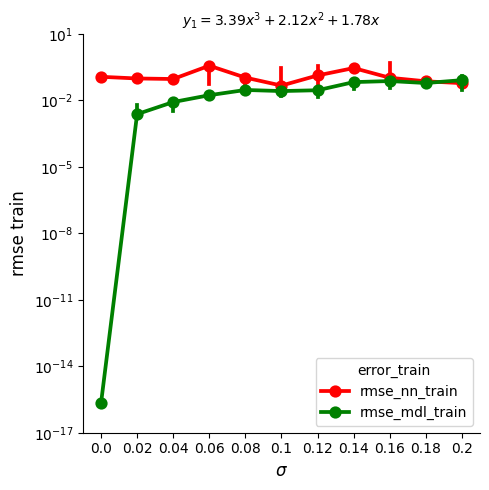

<Figure size 944.882x708.661 with 0 Axes>

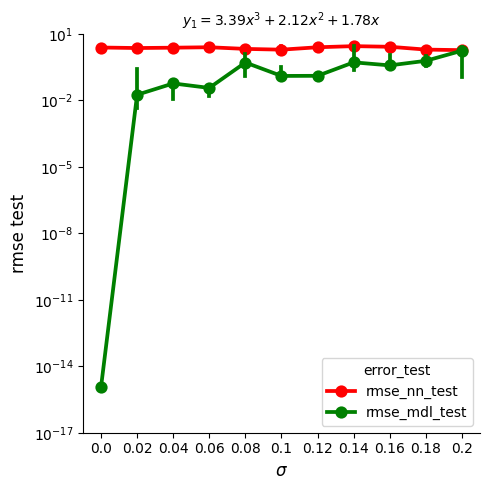

In [66]:
#Plot nguyen train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_plot, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(titles[func_number],fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_' + str(func_number) + '_medians_train'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Plot nguyen test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_plot, x='sigma', y='value_test', hue='error_test', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(titles[func_number],fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse test',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_' + str(func_number) + '_medians_test'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

In [ ]:
#Plot individual results
#Show individual results
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_plot, x='sigma', y='value_train', hue='error_train',palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_plot, x='sigma', y='value_test', hue='error_test',palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

(1e-17, 10)

<Figure size 944.882x708.661 with 0 Axes>

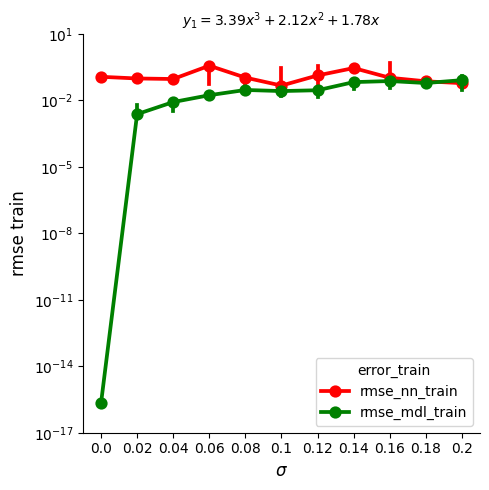

<Figure size 944.882x708.661 with 0 Axes>

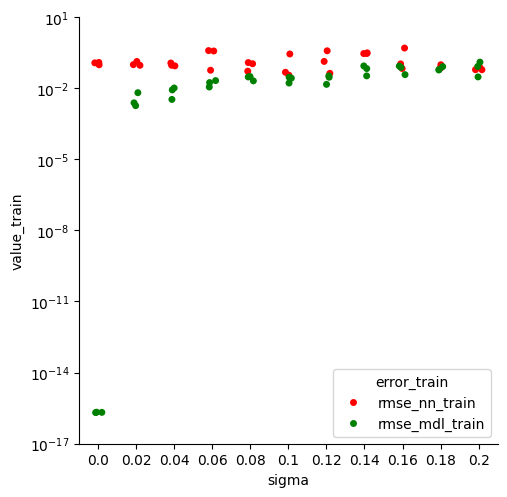

In [43]:
#nguyen 1 - rmse train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_1, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_1=3.39 x^3 + 2.12 x^2 +1.78x$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()


name_fig='nguyen_1_medians_train'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Show individual results
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_1, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

(1e-16, 10)

<Figure size 944.882x708.661 with 0 Axes>

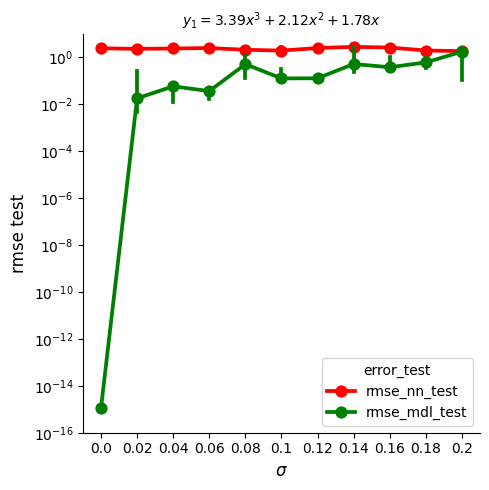

<Figure size 944.882x708.661 with 0 Axes>

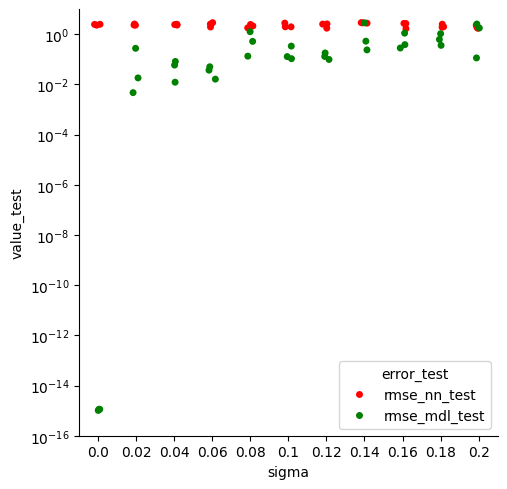

In [28]:
#nguyen 1 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_1=3.39 x^3 + 2.12 x^2 +1.78x$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse test',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_1_medians_test'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.ylim(ymin,ymax)

<Figure size 944.882x708.661 with 0 Axes>

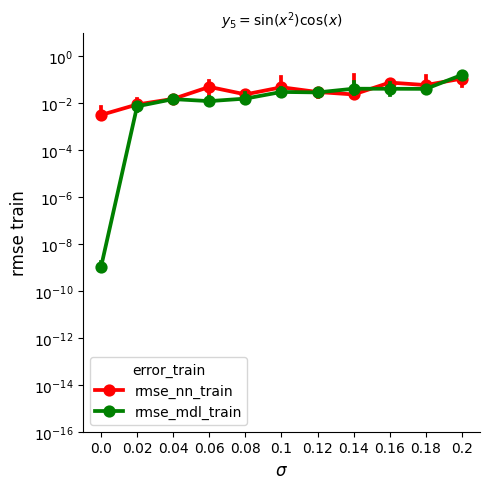

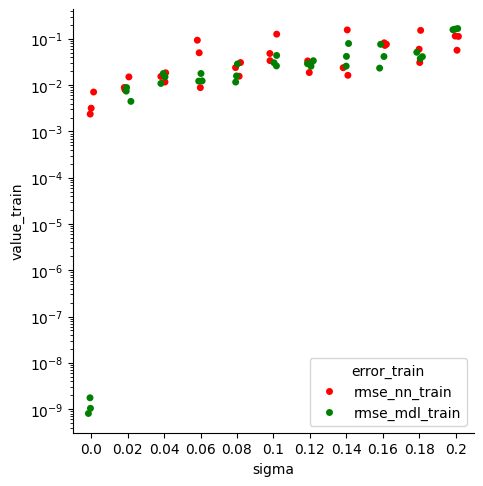

In [29]:
#nguyen 5 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_5, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_5=\sin(x^2) \cos(x)$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_5_medians_train'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Show individual results
sns.catplot(data=errors_train_5, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

<Figure size 944.882x708.661 with 0 Axes>

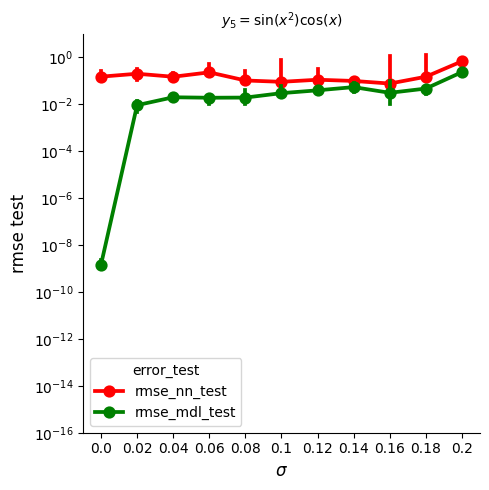

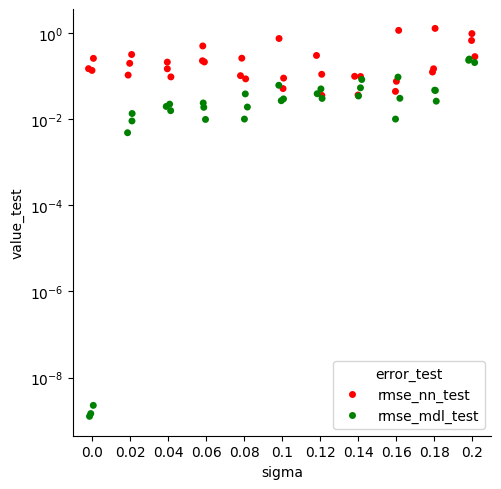

In [31]:
#nguyen 5 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_5, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_5=\sin(x^2) \cos(x)$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse test',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_5_medians_test'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Show individual results
sns.catplot(data=errors_test_5, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.show()

<Figure size 944.882x708.661 with 0 Axes>

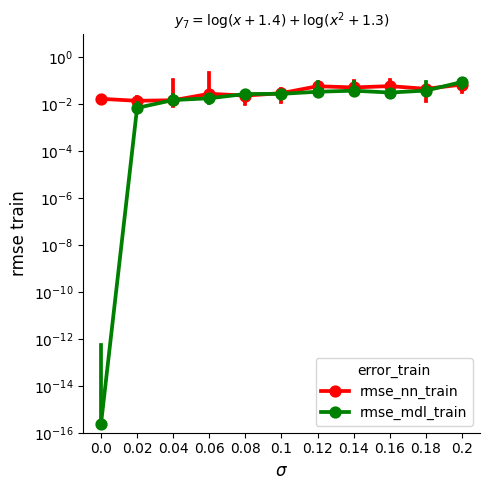

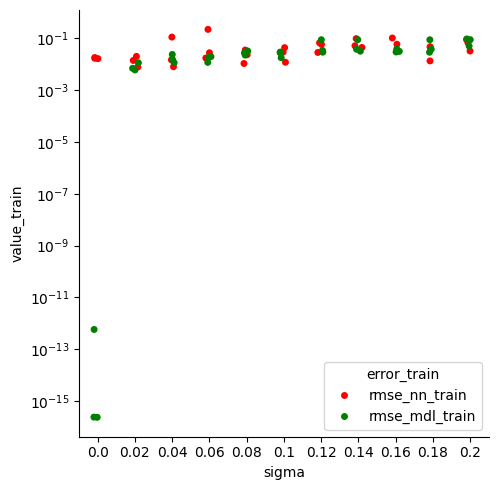

In [34]:
#nguyen 7 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_7, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_7=\log(x+1.4) + \log(x^2 + 1.3)$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_7_medians_train'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Plot individual results
sns.catplot(data=errors_train_7, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.show()

<Figure size 944.882x708.661 with 0 Axes>

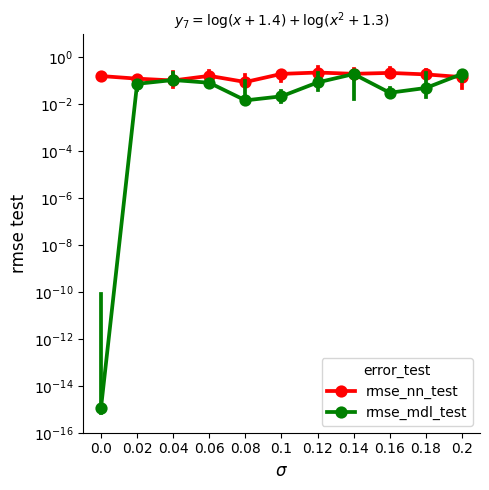

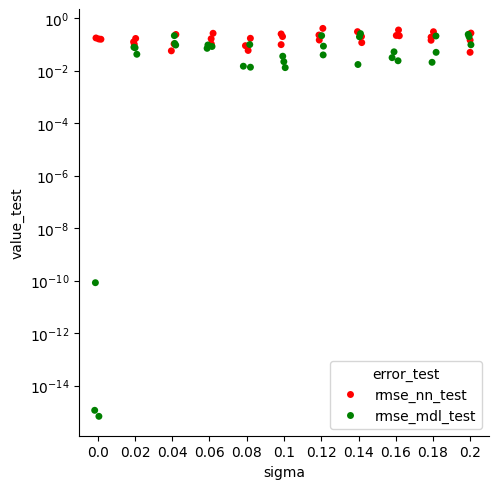

In [35]:
#nguyen 7 - test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_7, x='sigma', y='value_test', hue='error_test', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_7=\log(x+1.4) + \log(x^2 + 1.3)$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse test',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_7_medians_test'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Plot individual results
sns.catplot(data=errors_test_7, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")
plt.show()

<Figure size 944.882x708.661 with 0 Axes>

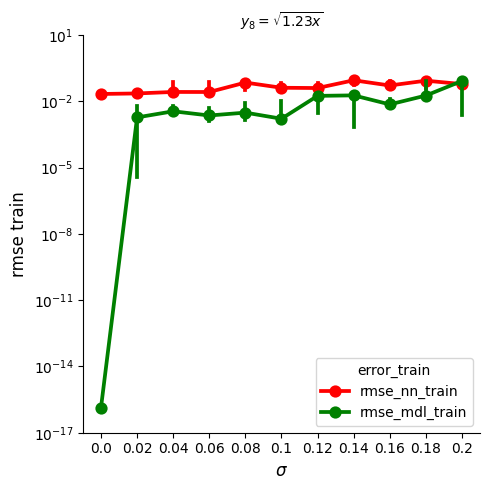

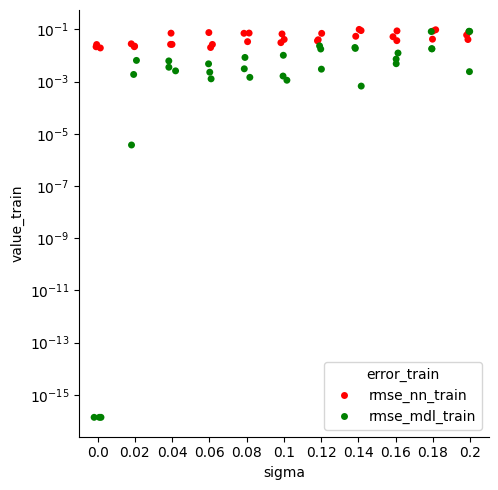

In [44]:
#nguyen 8 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_8, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_8=\sqrt{1.23x}$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis) 
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_8_medians_train'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

sns.catplot(data=errors_train_8, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

<Figure size 944.882x708.661 with 0 Axes>

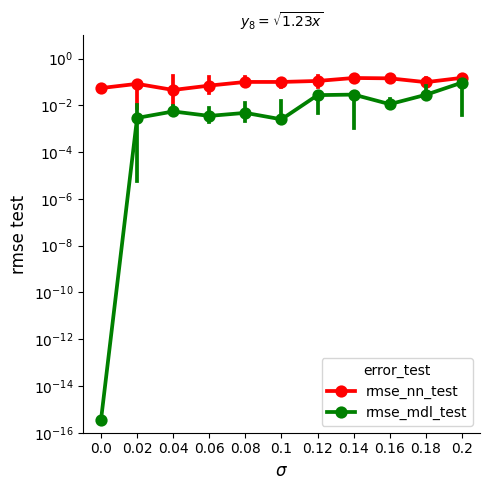

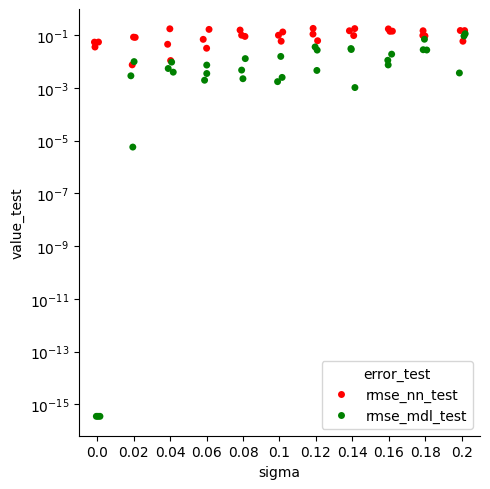

In [39]:
#nguyen 8 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_8, x='sigma', y='value_test', hue="error_test", kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_8=\sqrt{1.23x}$',fontsize=size_ticks)

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse test',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_8_medians_test'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

sns.catplot(data=errors_test_8, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

<Figure size 944.882x708.661 with 0 Axes>

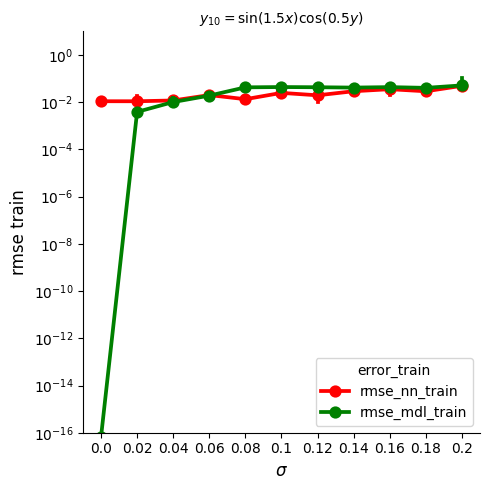

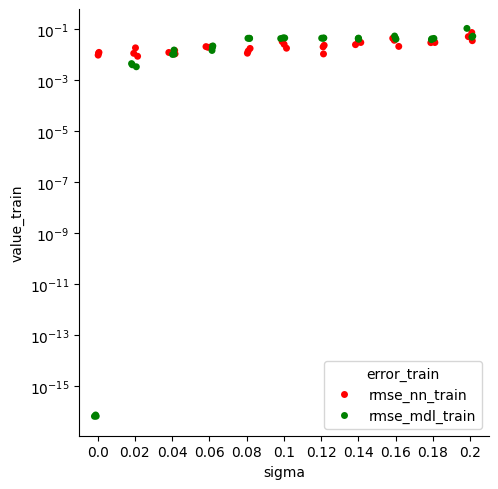

In [40]:
#nguyen 10 - train
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_train_10, x='sigma', y='value_train', hue='error_train', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)
plt.title(r'$y_{10}=\sin(1.5x) \cos(0.5y)$',fontsize=size_ticks)

plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis);plt.ylabel('rmse train',fontsize=size_axis)
plt.yscale("log")
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_10_medians_train'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#Plot individual results
sns.catplot(data=errors_train_10, x='sigma', y='value_train', hue="error_train",palette=['red', 'green'],legend_out=False)
plt.yscale("log")

<Figure size 944.882x708.661 with 0 Axes>

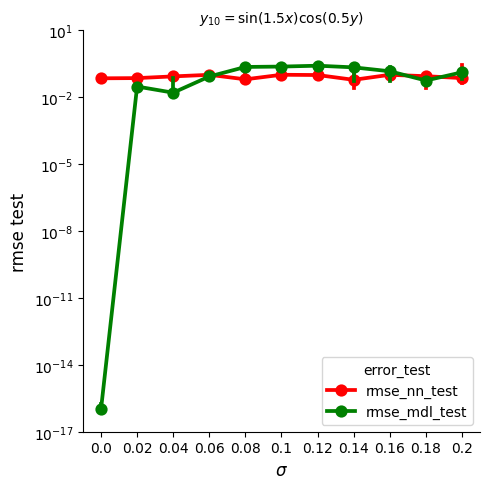

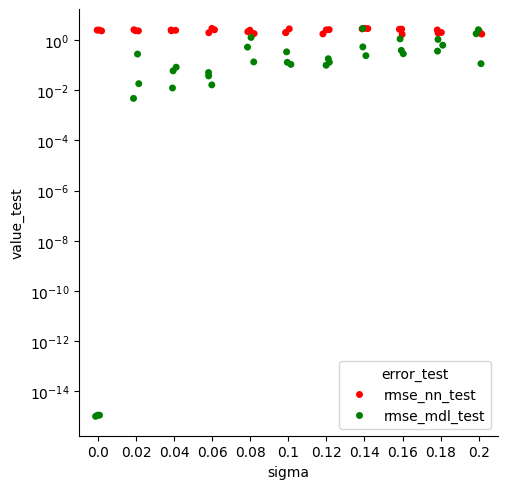

In [45]:
#nguyen 10 - rmse test
fig=figure(figsize=(width,height), dpi=300)
sns.catplot(data=errors_test_10, x='sigma', y='value_test', hue='error_test', kind='point', estimator='median',
            errorbar=('ci', 95),n_boot=resamples, seed=bs_seed, palette=['red', 'green'],legend_out=False)

plt.title(r'$y_{10}=\sin(1.5x) \cos(0.5y)$',fontsize=size_ticks)
plt.yscale("log")

#labels, limits, and ticks
plt.xlabel(r'$\sigma$',fontsize=size_axis) 
plt.ylabel('rmse test',fontsize=size_axis)
plt.xticks(fontsize=size_ticks);plt.yticks(fontsize=size_ticks)
plt.ylim(ymin,ymax)

plt.tight_layout()

name_fig='nguyen_10_medians_test'
plt.savefig(output_path+name_fig + '.svg',dpi=300)
plt.savefig(output_path+name_fig + '.png',dpi=300)

#plot individual results
sns.catplot(data=errors_test_1, x='sigma', y='value_test', hue="error_test",palette=['red', 'green'],legend_out=False)
plt.yscale("log")